<a href="https://colab.research.google.com/github/rajputankur56/stock_price_prediction_ml/blob/master/stock_price_predictin_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
# to normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [8]:
# read data file
df = pd.read_csv('./AAPL.csv',header=0)
df.fillna(0,inplace=True)
df.head()
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adjusted_close', 'Volume',
       'SMA5', 'SMA21', 'SMA50', 'MACD', 'MACDS', 'RSI', 'ATRts', 'ATRts1',
       'Gap', 'Price_Retrace', 'Macd_Retrace'],
      dtype='object')

In [11]:
X_var = df.loc[:,['Open','High','Low','Adjusted_close', 'Volume',
       'SMA5', 'SMA21', 'SMA50', 'MACD', 'MACDS', 'RSI', 'ATRts', 'ATRts1',
       'Gap', 'Price_Retrace', 'Macd_Retrace']]
X_var.head()

Y_var = df.loc[:,['Close']]
Y_var.head()

,Close
0,203.400
1,202.550
2,202.928
3,201.670
4,200.416


In [22]:
## shuffle data
from sklearn.utils import shuffle
X_var,Y_var = shuffle(X_var,Y_var,random_state=42)
X_var.shape

(2518, 16)

In [23]:


from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_var,Y_var,train_size=0.8,random_state= 42)
X_train.shape
# X_test.shape

(2014, 16)

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lin_reg.score(X_test,Y_test)

0.9998586242846036

In [27]:
lin_reg.score(X_test,lin_reg.predict(X_test))

1.0

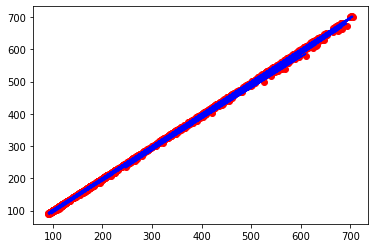

In [34]:
plt.scatter(X_train['High'],Y_train,color='red')
plt.plot(X_train['High'],lin_reg.predict(X_train),color='blue')
# ## visualise training set
# plt.scatter(X_train,Y_train,color='red')
# plt.plot(X_train,regressor.predict(X_train),color='blue')
# plt.title('Salary vs Experience(training data)')
# plt.xlabel('Experience')
# plt.ylabel('Salary')
# plt.show()

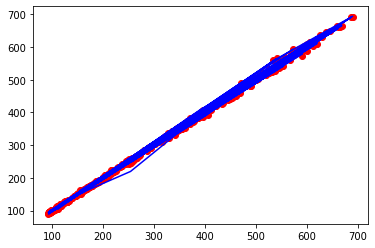

In [33]:
plt.scatter(X_test['Open'],Y_test,color='red')
plt.plot(X_test['Open'],lin_reg.predict(X_test),color='blue')